![logo-gt.png](attachment:logo-gt.png)

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>Project 5 and 6: <i>A reproducible guide to RNA-seq and differential gene expression analysis</i></h3>
    <h4>Deadline: 11:59PM, December 4th, 2023</h4>
    <h4>Total Points: 600</h4>
    
</div>

<div class="alert alert-block alert-danger">
    <h3>Alert!</h3>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

<div class="alert alert-block alert-info">
    <h2>Before you start, please read the following points carefully:</h2>
    <p>1. The objective of this project is to create a reproducible guide for RNA-seq data analysis followed by diffrential gene expression.</p>
    <p>2. This end goal of this notebook is to find up-and-down regulated transcripts between cases and controls, as defined by a randomized controlled trial. (This could be a disease-normal, drug-placebo, or high-low dose comparison)</p>
    <p>3. The n (cases + control samples) can be as low as 16 (eg: 8 cases and 8 controls) and can go up to 50</p>
    <p>4. RNA-seq analysis can be performed using Salmon, Kallisto, or Star (other tools exist, but we'll restrict to these three)</p>
    <p>5. <b>Using RStudio on Pace-ICE:</b> Please feel free to to use RStudio for diffrential gene expression analysis part of this project. Diffrential gene expression analysis can be performed using DESeq2, Sleuth, or EdgeR. DESeq2 is available in Python & R, meanwhile other tools might need to be installed during the R-Studio session on pace-ice. </p>
    <p>6. We will accept one R script file (in addition to this notebook) for this project's submission. Please make sure the RScript is well commented. It is up to you how you want structure this guide!</p>
    <hr>
    <p><b>Finally:</b> This is a much more open ended project compared to the last 4 ones. You will pick the data yourself and evaluate the findings. Please explain whatever work you have done <u>in as much detail as possible</u>. All commands and comments are essential. 
        
<p><b>Think:</b> as if your notebook will be used by another MS student who has very little idea about RNA-seq & diffrential gene expression analyses.</p>
</div>

---

# **1. Finding the right data**
### *Total Questions: 3*
### *Total Points: 60+20+20 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Locate samples for RNA-seq data analysis</h3>
    <p>SRA is a great resource to start with. Search for a disease or drug of interest, use appropriate filters and locate RNA-seq data files that are publically available. Ideally, stick to one SRA project and make sure the RNA-seq files are coming from a regular NGS run (they should be fastq files) </p> 
    
    
    
<p>Explain what experiment the data is coming from, how many cases/controls etc.</p>
</div>

In [3]:
### Add cells for commands, comments and important points to keep in mind.

<div class="alert alert-block alert-warning">
    <h3>NOTE</h3>
    
<p>We had started the project in a folder named "Project5&6" and were at step 3 when we were told to name the directory as "Project56". We have updated the paths to reflect "Project56" but some of the outputs(for cells which we could not rerun) still show "Project5&6".</p>
</div>

We are interested in performing RNAseq analysis on breast cancer to explore the differences in the gene expression levels of tumor vs normal samples. For this, we searched for data on Sequence Read Archives(SRA) and came across a project carried out to identify five cytotoxicity-related genes involved in the progression of human breast cancer.<br>
<strong>Accession: PRJNA76246</strong> <br>
Link - https://www.ncbi.nlm.nih.gov/bioproject/PRJNA762469

##### Experimental design <br>
30 pairs of normal and cancerous tissues from the same excision were collected and RNA sequencing was performed using Illumina HiSeq 2000 instrument to generate paired-end reads. More details about the experiment -
> Breast cancer is one of the deadly tumors in women, and its incidence continues to increase. This study aimed to identify novel therapeutic molecules using RNA sequencing (RNAseq) data of breast cancer from our hospitals. Overall design: 30 pairs of normal and cancerous tissues from the same excision were collected from the Affiliated Cancer Hospital of Guangzhou Medical University, the Affiliated Cancer Hospital of Sun Yat-sen University and Guangzhou Army General Hospital. RNA sequencing was performed by Guangzhou Huayin Health medical Group. Original reads of RNA sequencing data were normalized as FPKM data.


Corresponding to 60 samples, we have 60 SRR IDs, 30 of which are paired-end reads from normal tissue sequencing and 30 are from tumor sequencing.<br>
All the run-related data and metadata can be found here -<br>
https://www.ncbi.nlm.nih.gov/Traces/study/?acc=SRP336638&o=acc_s%3Aa

<div class="alert alert-block alert-warning">
    <h3>1.2 Download the data</h3>
    <p>Figure out how and where you will save these data files. Write the commands and show the final downloaded files using <i>ls -lh</i></p>
</div>

In [2]:
### Add cells for commands, comments and important points to keep in mind.

Since the FASTQ files are several GBs in size, we are using SRA toolkit to download the SRA files and eventually split the SRA files into paired-end SRA file.<br>
SRA toolkit from NCBI is a collection of tools and libraries for using data in the SRA - https://github.com/ncbi/sra-tools <br><br>
<strong> prefetch </strong> is a tool that downloads to a directory named by accession number <br>
<strong> fasterq-dump </strong> is a tool suited for large-scale conversion of SRA objects into FASTQ files and is faster since it supports multi-threaded and performs bulk joins in a way that improves performance.

In [2]:
#running prefetch help command to check if SRA toolkit is installed
!prefetch --help

Usage:
  prefetch [options] <SRA accession> [...]
  Download SRA files and their dependencies

  prefetch [options] --cart <kart file>
  Download cart file

  prefetch [options] <URL> --output-file <FILE>
  Download URL to FILE

  prefetch [options] <URL> [...] --output-directory <DIRECTORY>
  Download URL or URL-s to DIRECTORY

  prefetch [options] <SRA file> [...]
  Check SRA file for missed dependencies and download them


Options:
  -T|--type <value>                Specify file type to download. Default: sra 
  -t|--transport <http|fasp|both>  Transport: one of: fasp; http; both 
                                   [default]. (fasp only; http only; first try 
                                   fasp (ascp), use http if cannot download 
                                   using fasp). 
  --location <value>               Location of data. 

  -N|--min-size <size>             Minimum file size to download in KB 
                                   (inclusive). 
  -X|--max-size <size>     

In [4]:
#checking fasterq-dump command
!fasterq-dump


Usage:
  fasterq-dump <path> [options]
  fasterq-dump <accession> [options]

Options:
  -F|--format                      format (special, fastq, default=fastq) 
  -o|--outfile                     output-file 
  -O|--outdir                      output-dir 
  -b|--bufsize                     size of file-buffer dflt=1MB 
  -c|--curcache                    size of cursor-cache dflt=10MB 
  -m|--mem                         memory limit for sorting dflt=100MB 
  -t|--temp                        where to put temp. files dflt=curr dir 
  -e|--threads                     how many thread dflt=6 
  -p|--progress                    show progress 
  -x|--details                     print details 
  -s|--split-spot                  split spots into reads 
  -S|--split-files                 write reads into different files 
  -3|--split-3                     writes single reads in special file 
  --concatenate-reads              writes whole spots into one file 
  -Z|--stdout                      p

We downloaded the metadata file "SraRunTable.txt" for our dataset from NCBI -<br> https://www.ncbi.nlm.nih.gov/Traces/study/?acc=SRP336638&o=acc_s%3Aa

In [1]:
!head /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SraRunTable.txt

Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,Donor,Experiment,GEO_Accession (exp),Instrument,LibraryLayout,LibrarySelection,LibrarySource,metastasis,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,tissue
SRR15852393,RNA-Seq,300,9437210700,PRJNA762469,SAMN21395376,3251168741,GEO,public,"sra,run.zq,fastq","ncbi,gs,s3","s3.us-east-1,ncbi.public,gs.US",102548,SRX12143676,GSM5574685,Illumina HiSeq 2000,PAIRED,cDNA,TRANSCRIPTOMIC,yes,Homo sapiens,ILLUMINA,2021-09-16T00:00:00Z,2021-09-11T14:17:00Z,1,GSM5574685,breast,SRP336638,breast tumor
SRR15852394,RNA-Seq,300,6442287600,PRJNA762469,SAMN21395377,2169814827,GEO,public,"sra,fastq,run.zq","s3,ncbi,gs","s3.us-east-1,gs.US,ncbi.public",104338,SRX12143617,GSM5574686,Illumina HiSeq 2000,PAIRED,cDNA,TRANSCRIPTOMIC,yes,Homo sapiens,ILLUMINA,2021-09-16T00:00:00Z,2021-09-11T11:28:00Z,1,GSM5574686,breast,SRP336638,breast tumor
S

In [3]:
#filter only the Run IDs present in 1st column from the above downloaded file and remove the header
!cut -f1 -d , /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SraRunTable.txt | grep -v "Run*" > /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRRIDs.txt
!head /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRRIDs.txt 
!wc -l /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRRIDs.txt

SRR15852393
SRR15852394
SRR15852395
SRR15852396
SRR15852397
SRR15852398
SRR15852399
SRR15852400
SRR15852401
SRR15852402
60 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRRIDs.txt


Since there are 60 samples with every sample having paired end reads and each read file is >10GB, we are submitting a batch job to download all the SRA files and the get the corresponding FASTQ files

In [13]:
#write FASTQ files into a separate directory
!mkdir /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files

In [4]:
#script to run download the SRA files from NCBI website using SRA toolkit commands
!cat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/downloadSRR.sh

#!/bin/bash

for SRR in $(cat SRRIDs.txt)
do
	prefetch $SRR -O /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5\&6
	fasterq-dump $SRR -O /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5\&6/fastq_files --split-files -e 32
done



In [8]:
#give execute permission to the above shell script
!chmod u+x /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/downloadSRR.sh

In [5]:
#script to submit the batch job
!cat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/downloadSRR.sbatch

#!/bin/bash
#SBATCH -JDownloadSRRfiles                      # Job name
#SBATCH -N4 --ntasks-per-node=8                 # Number of nodes and cores per node required
#SBATCH --mem-per-cpu=11G                       # Memory per core
#SBATCH -t800                                   # Duration of the job (Ex: 15 mins)
#SBATCH -oReport-SRRdownload.out                # Combined output and error messages file
#SBATCH --mail-type=BEGIN,END,FAIL              # Mail preferences
#SBATCH --mail-user=akrishna311@gatech.edu      # E-mail address for notifications

./downloadSRR.sh


In [14]:
#show all files
!ls -lh /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/

total 164K
-rw-r--r-- 1 akrishna311 gtperson  573 Nov 23 23:34 downloadSRR.sbatch
-rwxr--r-- 1 akrishna311 gtperson  272 Nov 23 23:06 downloadSRR.sh
drwxr-xr-x 2 akrishna311 gtperson 4.0K Nov 23 23:37 fastq_files
-rwx------ 1 akrishna311 gtperson 114K Nov 23 23:36 Project5and6-RNASeqAndDiffrentialGeneExpression.ipynb
-rw-r--r-- 1 akrishna311 gtperson  21K Nov 23 23:11 SraRunTable.txt
-rw-r--r-- 1 akrishna311 gtperson  720 Nov 23 23:19 SRRIDs.txt


In [21]:
#Submitting the job
!sbatch /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/downloadSRR.sbatch

Submitted batch job 234519


In [6]:
#output report generated by the job showing all the SRR files were downloaded successfully
!cat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/Report-SRRdownload.out

---------------------------------------
Begin Slurm Prolog: Nov-23-2023 23:53:00
Job ID:    234519
User ID:   akrishna311
Account:   no-dept
Job name:  DownloadSRRfiles
Partition: pace-cpu
---------------------------------------

2023-11-24T04:53:02 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-11-24T04:53:02 prefetch.3.0.8: 1) Downloading 'SRR15852393'...
2023-11-24T04:53:02 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-11-24T04:53:02 prefetch.3.0.8:  Downloading via HTTPS...
2023-11-24T04:55:11 prefetch.3.0.8:  HTTPS download succeed
2023-11-24T04:55:19 prefetch.3.0.8:  'SRR15852393' is valid
2023-11-24T04:55:19 prefetch.3.0.8: 1) 'SRR15852393' was downloaded successfully
2023-11-24T04:55:19 prefetch.3.0.8: 'SRR15852393' has 0 unresolved dependencies
spots read      : 31,457,369
reads read      : 62,914,73

In [7]:
#show SRA files that were downloaded
!ls -d /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR*

/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR15852393
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR15852394
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR15852395
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR15852396
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR15852397
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR15852398
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR15852399
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR15852400
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR15852401
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR15852402
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRR15852403
/home/hice1/akrishna311/biol6150

In [1]:
#show FASTQ files downloaded
!ls -lh /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/SRR*

-rw-r--r-- 1 akrishna311 gtperson  14G Nov 23 23:57 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/SRR15852393_1.fastq
-rw-r--r-- 1 akrishna311 gtperson  14G Nov 23 23:57 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/SRR15852393_2.fastq
-rw-r--r-- 1 akrishna311 gtperson 9.0G Nov 24 00:01 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/SRR15852394_1.fastq
-rw-r--r-- 1 akrishna311 gtperson 9.0G Nov 24 00:01 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/SRR15852394_2.fastq
-rw-r--r-- 1 akrishna311 gtperson 9.3G Nov 24 00:04 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/SRR15852395_1.fastq
-rw-r--r-- 1 akrishna311 gtperson 9.3G Nov 24 00:04 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/SRR15852395_2.fastq
-rw-r--r-- 1 akrishna311 gtperson  11G N

<div class="alert alert-block alert-warning">
    <h3>1.3 Talk about the RNA-seq files</h3>
    <p>Summarize the study from which you have extracted the RNA-seq data files. Are there any genes/transcripts you expect to find up-or-down regulated?</p>
</div>

In [4]:
### Add cells for commands, comments and important points to keep in mind.

The study identified there were 2,953 Differentially Expressed Genes(DEGs) between cancerous and matched normal tissue, as well as 975 DEGs between primary breast cancer and metastatic breast cancer. These genes were primarily enriched in PI3K-Akt signaling pathway, calcium signaling pathway, cAMP signaling pathway, and cell cycle. <br> <br> Notably, CD8+ T cell, M0 macrophage, M1 macrophage, regulatory T cell and follicular helper T cell were significantly elevated in cancerous tissue as compared with matched normal tissue. Eventually, it was found five genes - <strong> GALNTL5, MLIP, HMCN2, LRRN4CL, and DUOX2 </strong> were markedly corelated with CD8+ T cell infiltration and cytotoxicity, and associated with therapeutic response.

# **2. Quality control**
### *Total Questions: 2*
### *Total Points: 50+50 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Pre-QC</h3>
    <p>Run the tools of your choice to summarize the read quality contained in your fastq files. Contrary to last time, you now have multiple fastq files (minimum 15 pairs). Sometimes results from QC tools are also summarized in simple text files which can be read using a simple piece of code and summarized using graphs in python.</p>
</div>

In [14]:
### Add cells for commands, comments and important points to keep in mind.

In [13]:
#we are using fastqc to check the quality of the FASTQ files
!fastqc --help


            FastQC - A high throughput sequence QC analysis tool

SYNOPSIS

	fastqc seqfile1 seqfile2 .. seqfileN

    fastqc [-o output dir] [--(no)extract] [-f fastq|bam|sam] 
           [-c contaminant file] seqfile1 .. seqfileN

DESCRIPTION

    FastQC reads a set of sequence files and produces from each one a quality
    control report consisting of a number of different modules, each one of 
    which will help to identify a different potential type of problem in your
    data.
    
    If no files to process are specified on the command line then the program
    will start as an interactive graphical application.  If files are provided
    on the command line then the program will run with no user interaction
    required.  In this mode it is suitable for inclusion into a standardised
    analysis pipeline.
    
    The options for the program as as follows:
    
    -h --help       Print this help file and exit
    
    -v --version    Print the version of the program and exit

In [16]:
#create directory to write QC report
!mkdir /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/before_qc

In [17]:
#running fastqc on all the paired-end fastq files
!find /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/ -name "*.fastq" \
| xargs -P 20 -n 1 \
fastqc -t 48 -o /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/before_qc --memory 1000

null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
Started analysis of SRR15852399_2.fastq
Started analysis of SRR15852398_1.fastq
Started analysis of SRR15852393_1.fastq
Started analysis of SRR15852394_1.fastq
Started analysis of SRR15852400_2.fastq
Started analysis of SRR15852393_2.fastq
Started analysis of SRR15852402_2.fastq
Started analysis of SRR15852394_2.fastq
Started analysis of SRR15852398_2.fastq
Started analysis of SRR15852397_1.fastq
Started analysis of SRR15852397_2.fastq
Started analysis of SRR15852402_1.fastq
Started analysis of SRR15852395_1.fastq
Started analysis of SRR15852399_1.fastq
Started analysis of SRR15852401_1.fastq
Started analysis of SRR15852400_1.fastq
Started analysis of SRR15852396_1.fastq
Started analysis of SRR15852401_2.fastq
Started analysis of SRR15852395_2.fastq
Started analysis of SRR15852396_2.fastq
Approx 5% complete for SRR15852399_1.fastq
Approx 5% complete for SRR15852400_2.fastq
Approx 5% comp

fastqc options: <br>
-t: number of threads<br>
-o: ouput directory<br>
--memory: base amout of memory to process each file in MB

In [19]:
#counting the number of files that was created by fastqc. 
#We had 60X2(paired-end) = 120 files. fastqc generates HTML and .zip files for each file. So, in total, we should have 240 files
!ls /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/before_qc | wc -l

240


In [27]:
#unzip the .zip files created by fastqc
!for zipfile in $(ls /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/before_qc/*.zip); do unzip -d /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/before_qc $zipfile &>/dev/null; done

In [45]:
#extract the details from summary.txt file in the unzipped files
!for folder in $(ls -d /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/before_qc/SRR*qc); do cat $folder/summary.txt >> /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/before_qc/agg_summary.tsv; done

In [2]:
#show aggregated summary file
!head -15 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/before_qc/agg_summary.tsv

PASS	Basic Statistics	SRR15852393_1.fastq
PASS	Per base sequence quality	SRR15852393_1.fastq
PASS	Per tile sequence quality	SRR15852393_1.fastq
PASS	Per sequence quality scores	SRR15852393_1.fastq
WARN	Per base sequence content	SRR15852393_1.fastq
FAIL	Per sequence GC content	SRR15852393_1.fastq
PASS	Per base N content	SRR15852393_1.fastq
PASS	Sequence Length Distribution	SRR15852393_1.fastq
FAIL	Sequence Duplication Levels	SRR15852393_1.fastq
WARN	Overrepresented sequences	SRR15852393_1.fastq
FAIL	Adapter Content	SRR15852393_1.fastq
PASS	Basic Statistics	SRR15852393_2.fastq
PASS	Per base sequence quality	SRR15852393_2.fastq
PASS	Per tile sequence quality	SRR15852393_2.fastq
PASS	Per sequence quality scores	SRR15852393_2.fastq


In [3]:
#add header line to the TSV file
!sed -i '1s/^/Result\tQuality Parameter\tFASTQ File\n/' /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/before_qc/agg_summary.tsv

In [4]:
#check if header was added
!head -15 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/before_qc/agg_summary.tsv

Result	Quality Parameter	FASTQ File
PASS	Basic Statistics	SRR15852393_1.fastq
PASS	Per base sequence quality	SRR15852393_1.fastq
PASS	Per tile sequence quality	SRR15852393_1.fastq
PASS	Per sequence quality scores	SRR15852393_1.fastq
WARN	Per base sequence content	SRR15852393_1.fastq
FAIL	Per sequence GC content	SRR15852393_1.fastq
PASS	Per base N content	SRR15852393_1.fastq
PASS	Sequence Length Distribution	SRR15852393_1.fastq
FAIL	Sequence Duplication Levels	SRR15852393_1.fastq
WARN	Overrepresented sequences	SRR15852393_1.fastq
FAIL	Adapter Content	SRR15852393_1.fastq
PASS	Basic Statistics	SRR15852393_2.fastq
PASS	Per base sequence quality	SRR15852393_2.fastq
PASS	Per tile sequence quality	SRR15852393_2.fastq


To visualize the quality of the aggregated QC data, we will use bar chart for below quality metrics:
1. Per base sequence quality
2. Per base sequence content
3. Per sequence quality scores
4. Adapter Content


In [28]:
import pandas as pd 

#create a dataframe from aggregated summary file above
aggr_qc_df=pd.read_table("/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/before_qc/agg_summary.tsv", delimiter='\t')
aggr_qc_df

,Result,Quality Parameter,FASTQ File
0,PASS,Basic Statistics,SRR15852393_1.fastq
1,PASS,Per base sequence quality,SRR15852393_1.fastq
2,PASS,Per tile sequence quality,SRR15852393_1.fastq
3,PASS,Per sequence quality scores,SRR15852393_1.fastq
4,WARN,Per base sequence content,SRR15852393_1.fastq
...,...,...,...
1315,PASS,Per base N content,SRR15852452_2.fastq
1316,PASS,Sequence Length Distribution,SRR15852452_2.fastq
1317,FAIL,Sequence Duplication Levels,SRR15852452_2.fastq
1318,WARN,Overrepresented sequences,SRR15852452_2.fastq


In [29]:
#grouping the counts based on Quality Parameter and Result
aggr_counts = aggr_qc_df.groupby(['Quality Parameter', 'Result'])['Result'].count()

In [30]:
#creating dataframe with the counts
result_df = aggr_counts.reset_index(name='Count')
result_df

,Quality Parameter,Result,Count
0,Adapter Content,FAIL,120
1,Basic Statistics,PASS,120
2,Overrepresented sequences,FAIL,2
3,Overrepresented sequences,PASS,9
4,Overrepresented sequences,WARN,109
5,Per base N content,PASS,120
6,Per base sequence content,FAIL,50
7,Per base sequence content,PASS,7
8,Per base sequence content,WARN,63
9,Per base sequence quality,PASS,120


In [31]:
#filterng the dataframe to retain quality parameters of interest 
result_df_filtered = result_df.loc[(result_df['Quality Parameter'] == 'Adapter Content') |
              (result_df['Quality Parameter'] == 'Per base sequence content') |
              (result_df['Quality Parameter'] == 'Per base sequence quality') |
              (result_df['Quality Parameter'] == 'Per sequence quality scores')
             ]
result_df_filtered

,Quality Parameter,Result,Count
0,Adapter Content,FAIL,120
6,Per base sequence content,FAIL,50
7,Per base sequence content,PASS,7
8,Per base sequence content,WARN,63
9,Per base sequence quality,PASS,120
13,Per sequence quality scores,PASS,120


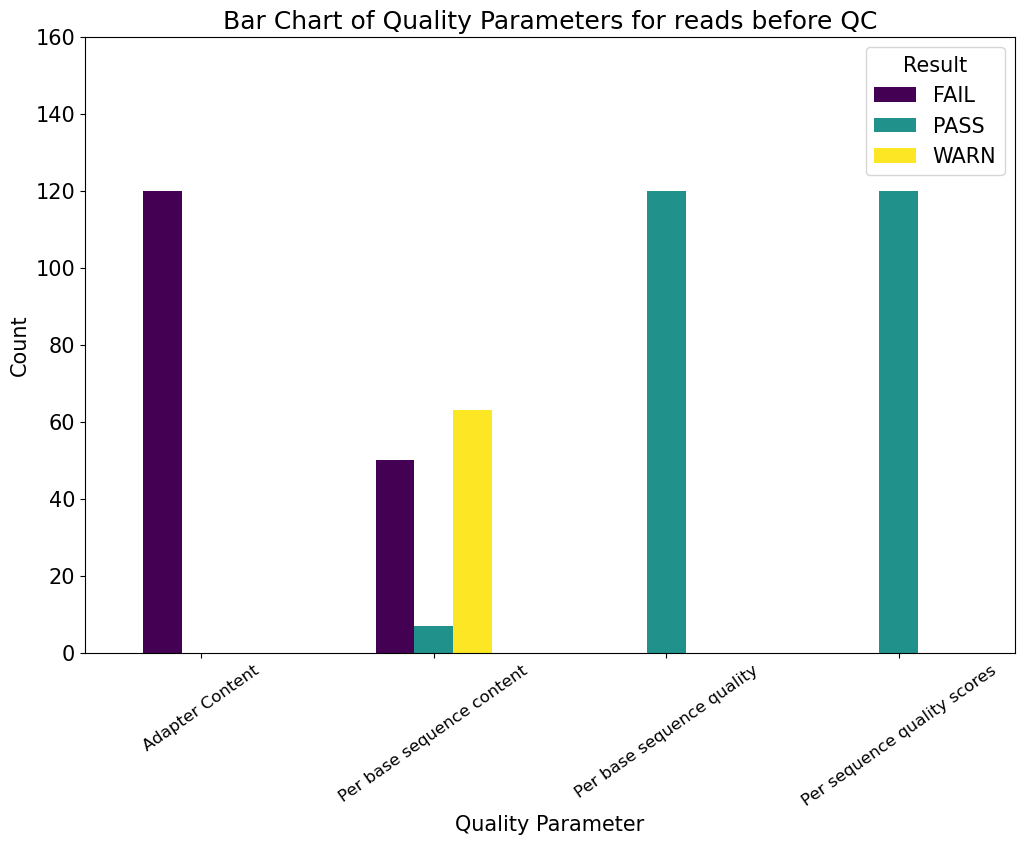

In [56]:
#visualize the quality parameters
import matplotlib.pyplot as plt
import matplotlib as mlp

# Pivot the DataFrame
pivot_df = result_df_filtered.pivot(index='Quality Parameter', columns='Result', values='Count').fillna(0)

# Plot the bar graph
bar_width = 0.5
pivot_df.plot(kind='bar', colormap='viridis')

# Customize the chart
mlp.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (12,8)

plt.xticks(fontsize=12, rotation=35)
plt.xlabel('Quality Parameter')

plt.ylabel('Count')
plt.yticks(range(0, 180, 20))
plt.title('Bar Chart of Quality Parameters for reads before QC')
plt.legend(title='Result', loc='upper right')

# Show the chart
plt.show()

As we can see from the plot above, the adapter contamination in the FASTQ files are high which has also affected the 'Per base sequence content' parameter. However, the 'Per base sequence quality' and 'Per sequence quality scores' of the FASTQ files look good. Hence we will be using "fastp" tool to remove adapter contamination and by default, fastp removes the adapter sequences from the reads.

<div class="alert alert-block alert-warning">
    <h3>2.2 Post-QC</h3>
    <p>How and what did you trim/prune? Show your commands of the tools used and summarize the final fastq files.</p>
</div>

In [15]:
### Add cells for commands, comments and important points to keep in mind.

In [52]:
#check fastp
!fastp --help

usage: fastp [options] ... 
options:
  -i, --in1                            read1 input file name (string [=])
  -o, --out1                           read1 output file name (string [=])
  -I, --in2                            read2 input file name (string [=])
  -O, --out2                           read2 output file name (string [=])
      --unpaired1                      for PE input, if read1 passed QC but read2 not, it will be written to unpaired1. Default is to discard it. (string [=])
      --unpaired2                      for PE input, if read2 passed QC but read1 not, it will be written to unpaired2. If --unpaired2 is same as --unpaired1 (default mode), both unpaired reads will be written to this same file. (string [=])
      --overlapped_out                 for each read pair, output the overlapped region if it has no any mismatched base. (string [=])
      --failed_out                     specify the file to store reads that cannot pass the filters. (string [=])
  -m, --merge  

In [56]:
#using fastp to trim the paired-end reads
!cat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRRIDs.txt \
| xargs -n 1 -P 30 -I {} \
bash -c "fastp \
-i /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/{}_1.fastq \
-I /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/{}_2.fastq \
-o /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/{}_trimmed_1.fastq \
-O /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/{}_trimmed_2.fastq \
-w 48"

48
48
48
Read1 before filtering:
total reads: 17595206
total bases: 2639280900
Q20 bases: 2569130623(97.3421%)
Q30 bases: 2460067937(93.2098%)

Read2 before filtering:
total reads: 17595206
total bases: 2639280900
Q20 bases: 2556758464(96.8733%)
Q30 bases: 2423594348(91.8278%)

Read1 after filtering:
total reads: 17459335
total bases: 2028329547
Q20 bases: 1992078462(98.2128%)
Q30 bases: 1921290938(94.7228%)

Read2 after filtering:
total reads: 17459335
total bases: 2028329547
Q20 bases: 1987711174(97.9974%)
Q30 bases: 1901911496(93.7674%)

Filtering result:
reads passed filter: 34918670
reads failed due to low quality: 270460
reads failed due to too many N: 1282
reads failed due to too short: 0
reads with adapter trimmed: 28482332
bases trimmed due to adapters: 1183107570

Duplication rate: 15.1635%

Insert size peak (evaluated by paired-end reads): 117

JSON report: fastp.json
HTML report: fastp.html

fastp -i /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5

fastp options: <br>
-i: read1 input file name<br>
-I: read2 input file name<br>
-o: read1 output file name<br>
-O: read1 output file name<br>
-w: number of threads

In [57]:
#move the trimmed FASTQ files to a separate directory
!mkdir /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/trimmed
!mv /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/*trimmed*.fastq /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/trimmed/

In [58]:
#create directory to write QC report after trimming
!mkdir /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/after_qc

In [60]:
#running fastqc on all the trimmed paired-end fastq files
!find /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/trimmed -name "*.fastq" \
| xargs -P 30 -n 1 \
fastqc -t 48 -o /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/after_qc --extract --delete --memory 1000

null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
Started analysis of SRR15852399_trimmed_2.fastq
Started analysis of SRR15852397_trimmed_2.fastq
Started analysis of SRR15852404_trimmed_2.fastq
Started analysis of SRR15852407_trimmed_2.fastq
Started analysis of SRR15852400_trimmed_2.fastq
Started analysis of SRR15852397_trimmed_1.fastq
Started analysis of SRR15852401_trimmed_2.fastq
Started analysis of SRR15852396_trimmed_1.fastq
Started analysis of SRR15852403_trimmed_1.fastq
Started analysis of SRR15852401_trimmed_1.fastq
Started analysis of SRR15852398_trimmed_2.fastq
Started analysis of SRR15852405_trimmed_2.fastq
Started analysis of SRR15852394_trimmed_2.fastq
Started analysis of SRR15852402_trimmed_2.fastq
Started analysis of SRR15852405_trimmed_1.fastq
Started analysis of SRR15852403_trimmed_2.fastq
Started analysis of SRR15852394_trimmed_1.fastq
Started analysis of SRR15852399_tr

fastqc options: <br>
-t: number of threads <br>
-o: ouput directory <br>
--extract: extract the output zipped file in the same directory <br>
--delete: delete the .zip file <br>
--memory: base amout of memory to process each file in MB <br>

In [61]:
#extract the details from summary.txt file in the unzipped files after QC
!for folder in $(ls -d /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/after_qc/SRR*qc); do cat $folder/summary.txt >> /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/after_qc/agg_summary.tsv; done

In [5]:
#show aggregated summary file
!head -15 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/after_qc/agg_summary.tsv

PASS	Basic Statistics	SRR15852393_trimmed_1.fastq
PASS	Per base sequence quality	SRR15852393_trimmed_1.fastq
PASS	Per tile sequence quality	SRR15852393_trimmed_1.fastq
PASS	Per sequence quality scores	SRR15852393_trimmed_1.fastq
WARN	Per base sequence content	SRR15852393_trimmed_1.fastq
FAIL	Per sequence GC content	SRR15852393_trimmed_1.fastq
PASS	Per base N content	SRR15852393_trimmed_1.fastq
WARN	Sequence Length Distribution	SRR15852393_trimmed_1.fastq
FAIL	Sequence Duplication Levels	SRR15852393_trimmed_1.fastq
WARN	Overrepresented sequences	SRR15852393_trimmed_1.fastq
PASS	Adapter Content	SRR15852393_trimmed_1.fastq
PASS	Basic Statistics	SRR15852393_trimmed_2.fastq
PASS	Per base sequence quality	SRR15852393_trimmed_2.fastq
PASS	Per tile sequence quality	SRR15852393_trimmed_2.fastq
PASS	Per sequence quality scores	SRR15852393_trimmed_2.fastq


In [6]:
#add header line to the TSV file
!sed -i '1s/^/Result\tQuality Parameter\tFASTQ File\n/' /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/after_qc/agg_summary.tsv

In [7]:
#check if header was added
!head -15 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/after_qc/agg_summary.tsv

Result	Quality Parameter	FASTQ File
PASS	Basic Statistics	SRR15852393_trimmed_1.fastq
PASS	Per base sequence quality	SRR15852393_trimmed_1.fastq
PASS	Per tile sequence quality	SRR15852393_trimmed_1.fastq
PASS	Per sequence quality scores	SRR15852393_trimmed_1.fastq
WARN	Per base sequence content	SRR15852393_trimmed_1.fastq
FAIL	Per sequence GC content	SRR15852393_trimmed_1.fastq
PASS	Per base N content	SRR15852393_trimmed_1.fastq
WARN	Sequence Length Distribution	SRR15852393_trimmed_1.fastq
FAIL	Sequence Duplication Levels	SRR15852393_trimmed_1.fastq
WARN	Overrepresented sequences	SRR15852393_trimmed_1.fastq
PASS	Adapter Content	SRR15852393_trimmed_1.fastq
PASS	Basic Statistics	SRR15852393_trimmed_2.fastq
PASS	Per base sequence quality	SRR15852393_trimmed_2.fastq
PASS	Per tile sequence quality	SRR15852393_trimmed_2.fastq


In [58]:
#create a dataframe from aggregated summary file above
aggr_after_qc_df=pd.read_table("/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/after_qc/agg_summary.tsv", delimiter='\t')
aggr_after_qc_df

,Result,Quality Parameter,FASTQ File
0,PASS,Basic Statistics,SRR15852393_trimmed_1.fastq
1,PASS,Per base sequence quality,SRR15852393_trimmed_1.fastq
2,PASS,Per tile sequence quality,SRR15852393_trimmed_1.fastq
3,PASS,Per sequence quality scores,SRR15852393_trimmed_1.fastq
4,WARN,Per base sequence content,SRR15852393_trimmed_1.fastq
...,...,...,...
1315,PASS,Per base N content,SRR15852452_trimmed_2.fastq
1316,WARN,Sequence Length Distribution,SRR15852452_trimmed_2.fastq
1317,FAIL,Sequence Duplication Levels,SRR15852452_trimmed_2.fastq
1318,WARN,Overrepresented sequences,SRR15852452_trimmed_2.fastq


In [59]:
#grouping the counts based on Quality Parameter and Result
aggr_after_qc_counts = aggr_after_qc_df.groupby(['Quality Parameter', 'Result'])['Result'].count()

In [60]:
#creating dataframe with the counts
result_df_after_qc = aggr_after_qc_counts.reset_index(name='Count')
result_df_after_qc

,Quality Parameter,Result,Count
0,Adapter Content,PASS,120
1,Basic Statistics,PASS,120
2,Overrepresented sequences,FAIL,2
3,Overrepresented sequences,PASS,11
4,Overrepresented sequences,WARN,107
5,Per base N content,PASS,120
6,Per base sequence content,FAIL,17
7,Per base sequence content,PASS,8
8,Per base sequence content,WARN,95
9,Per base sequence quality,PASS,120


In [61]:
#filtering the dataframe to retain quality parameters of interest 
result_df_after_qc_filtered = result_df_after_qc.loc[(result_df['Quality Parameter'] == 'Adapter Content') |
              (result_df['Quality Parameter'] == 'Per base sequence content') |
              (result_df['Quality Parameter'] == 'Per base sequence quality') |
              (result_df['Quality Parameter'] == 'Per sequence quality scores')
             ]
result_df_after_qc_filtered

,Quality Parameter,Result,Count
0,Adapter Content,PASS,120
6,Per base sequence content,FAIL,17
7,Per base sequence content,PASS,8
8,Per base sequence content,WARN,95
9,Per base sequence quality,PASS,120
13,Per sequence quality scores,PASS,120


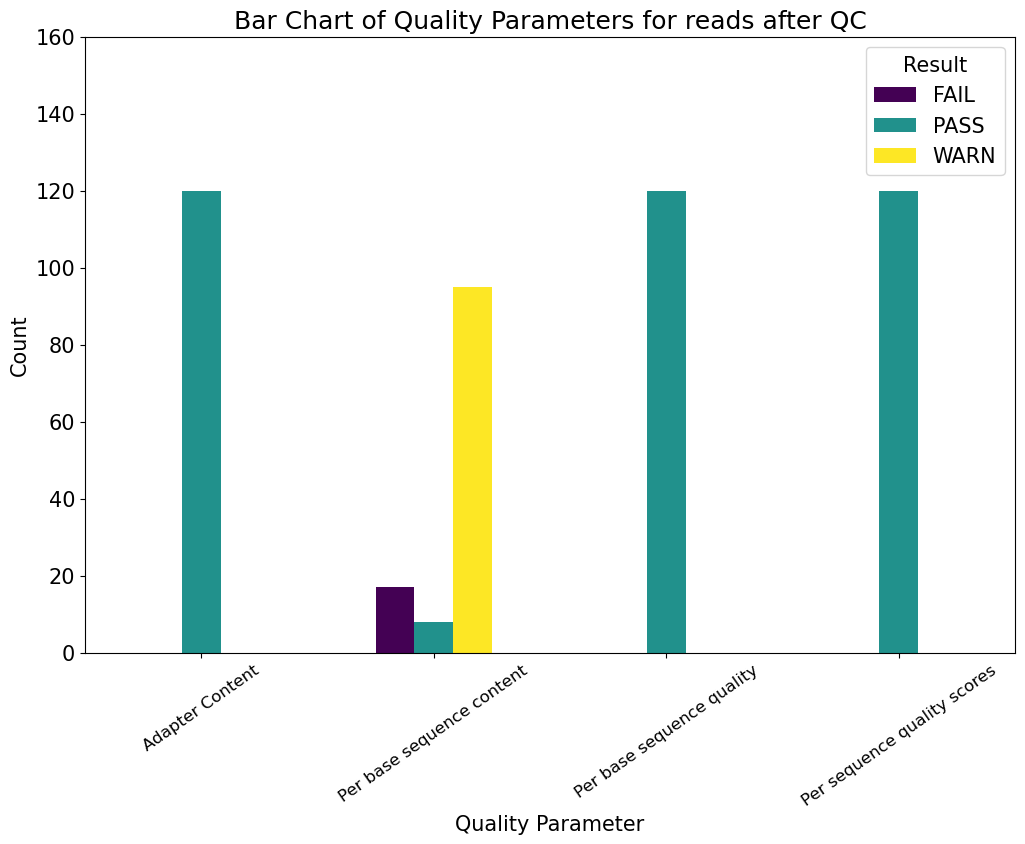

In [62]:
#visualize the quality parameters
import matplotlib.pyplot as plt
import matplotlib as mlp

# Pivot the DataFrame
pivot_df = result_df_after_qc_filtered.pivot(index='Quality Parameter', columns='Result', values='Count').fillna(0)

# Plot the bar graph
bar_width = 0.5
pivot_df.plot(kind='bar', colormap='viridis')

# Customize the chart
mlp.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (12,8)

plt.xticks(fontsize=12, rotation=35)
plt.xlabel('Quality Parameter')

plt.ylabel('Count')
plt.yticks(range(0, 180, 20))
plt.title('Bar Chart of Quality Parameters for reads after QC')
plt.legend(title='Result', loc='upper right')

# Show the chart
plt.show()

As we can see from the plot above, the adapter contamination in the trimmed FASTQ files are removed and we see all 120 files passed. The 'Per base sequence quality' and 'Per sequence quality scores' of the trimmed FASTQ files remain unchanged. We can see some improvement in the 'Per base sequence content', the number of fail is lower than before and pass and warn have increased.

<div class="alert alert-block alert-danger">
    <h2>Remember!</h2>
    <p>The objective of this project is to make a comprehensive guide to RNA-seq + diffrential gene expression analysis. Every step/tool/command etc. that you use, should be justified and documented. Figures are always a plus.</p>
</div>

# **3. RNA-seq analysis**
### *Total Questions: 1*
### *Total Points:  150*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Align and quantify</h3>
    <p>Make sure to talk about the following:</p>
    <p><b>1:</b> Reference files used, where they were downloaded from, their specs etc.</p>
    <p><b>2:</b> The tool(s) you are using. We have Salmon, Kallisto, and Star installed in the environment.</p>
    <p><b>3:</b> Use markdown texts to clearly detail the process of alignment and quantification.</p>
    <p><b>4:</b> Show all the files being produced using bash commands.</p>
    <p><b>5:</b> As always, tool commands should be commented and logs should be displayed.</p>
</div>

In [6]:
### Add cells for commands, comments and important points to keep in mind.

We are using GRCh38 human reference transcriptome we found on NCBI FTP website - https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/. <br><br>
Specs:
1. Assembly name: GRCh38.p14 - GRCh38, patch 14
2. Assembly accession: GCF_000001405.40<br>
https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/README.txt

In [2]:
#create directory to download reference transcriptome
!mkdir /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome

In [4]:
#download reference transcriptome for Human GRCh38 from NCBI website
!wget -O /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/referenceGRCh38.fna.gz https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/GRCh38_latest_rna.fna.gz

--2023-11-25 13:42:38--  https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/GRCh38_latest_rna.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 2607:f220:41e:250::11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135048066 (129M) [application/x-gzip]
Saving to: ‘/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5&6/refTranscriptome/referenceGRCh38.fna.gz’

/home/hice1/akrishn 100%[===================>] 128.79M  66.8MB/s    in 1.9s    

2023-11-25 13:42:41 (66.8 MB/s) - ‘/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5&6/refTranscriptome/referenceGRCh38.fna.gz’ saved [135048066/135048066]



In [5]:
#show reference file
!ls -lh /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/

total 130M
-rw-r--r-- 1 akrishna311 gtperson 129M Oct 11 12:39 referenceGRCh38.fna.gz


In [13]:
#check the reference file
!zcat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/referenceGRCh38.fna.gz | head

>NM_000014.6 Homo sapiens alpha-2-macroglobulin (A2M), transcript variant 1, mRNA
GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCTCCTCCAGCTCCTTCTTTCTGCAACATGGGGAAGA
ACAAACTCCTTCATCCAAGTCTGGTTCTTCTCCTCTTGGTCCTCCTGCCCACAGACGCCTCAGTCTCTGGAAAACCGCAG
TATATGGTTCTGGTCCCCTCCCTGCTCCACACTGAGACCACTGAGAAGGGCTGTGTCCTTCTGAGCTACCTGAATGAGAC
AGTGACTGTAAGTGCTTCCTTGGAGTCTGTCAGGGGAAACAGGAGCCTCTTCACTGACCTGGAGGCGGAGAATGACGTAC
TCCACTGTGTCGCCTTCGCTGTCCCAAAGTCTTCATCCAATGAGGAGGTAATGTTCCTCACTGTCCAAGTGAAAGGACCA
ACCCAAGAATTTAAGAAGCGGACCACAGTGATGGTTAAGAACGAGGACAGTCTGGTCTTTGTCCAGACAGACAAATCAAT
CTACAAACCAGGGCAGACAGTGAAATTTCGTGTTGTCTCCATGGATGAAAACTTTCACCCCCTGAATGAGTTGATTCCAC
TAGTATACATTCAGGATCCCAAAGGAAATCGCATCGCACAATGGCAGAGTTTCCAGTTAGAGGGTGGCCTCAAGCAATTT
TCTTTTCCCCTCTCATCAGAGCCCTTCCAGGGCTCCTACAAGGTGGTGGTACAGAAGAAATCAGGTGGAAGGACAGAGCA

gzip: stdout: Broken pipe


In [14]:
#Check the number of sequences in reference file
!zcat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/referenceGRCh38.fna.gz | grep ">" | wc -l

185121


In [15]:
#checking for different types of entries
!zcat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/referenceGRCh38.fna.gz | grep "NM" | wc -l
!zcat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/referenceGRCh38.fna.gz | grep "NR" | wc -l
!zcat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/referenceGRCh38.fna.gz | grep "NP" | wc -l

67577
24444
1805


In [16]:
#checking for different types of entries
!zcat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/referenceGRCh38.fna.gz | grep "XM" | wc -l
!zcat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/referenceGRCh38.fna.gz | grep "XR" | wc -l
!zcat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/referenceGRCh38.fna.gz | grep "XP" | wc -l

69099
26138
212


<div><img src="attachment:RefSeqAccession.png" width="500"/></div>

<strong> We are using Salmon to create index and for quantification</strong>

Salmon uses the reference transcriptome (in FASTA format) and raw sequencing reads (in FASTQ format) as input to perform both mapping and quantification of the reads.

The “quasi-mapping” approach utilized by Salmon requires a transcriptome reference index to determine the position and orientation information for where the fragments best map prior to quantification. The reference index essentially provides the transcriptome in a format that is easily and rapidly searchable. Therefore, it will allow us to quickly find the positions in the transcriptome where each of the reads originated.

### Indexing

In [10]:
#check Salmon index command
!salmon index --help

Version Server Response: Not Found

Index
Creates a salmon index.

Command Line Options:
  -v [ --version ]              print version string
  -h [ --help ]                 produce help message
  -t [ --transcripts ] arg      Transcript fasta file.
  -k [ --kmerLen ] arg (=31)    The size of k-mers that should be used for the 
                                quasi index.
  -i [ --index ] arg            salmon index.
  --gencode                     This flag will expect the input transcript 
                                fasta to be in GENCODE format, and will split 
                                the transcript name at the first '|' character.
                                These reduced names will be used in the output 
                                and when looking for these transcripts in a 
                                gene to transcript GTF.
  --features                    This flag will expect the input reference to be
                                in the tsv file for

In [11]:
#create directory for saving index file
!mkdir /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptIndex

Since indexing will take time, we are submitting a batch job.

In [17]:
#script to create index
!cat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SalmonIndex.sh

#!/bin/bash

#creating index
salmon index \
-t /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5\&6/refTranscriptome/referenceGRCh38.fna.gz \
-i /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5\&6/transcriptIndex \
-k 31 \
-p 48


Options:<br>
-t: reference transcript <br>
-i: path to write index files<br>
-k: size of kmers<br>
-p: no of threads<br>

In [15]:
#give execute permission to the above shell script
!chmod u+x /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SalmonIndex.sh

In [18]:
#script to submit the job
!cat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SalmonIndex.sbatch

#!/bin/bash
#SBATCH -JSalmonIndexfile                       # Job name
#SBATCH -N3 --ntasks-per-node=16                # Number of nodes and cores per node required
#SBATCH --mem-per-cpu=11G                       # Memory per core
#SBATCH -t600                                   # Duration of the job (Ex: 15 mins)
#SBATCH -oReport-SalmonIndex.out                # Combined output and error messages file
#SBATCH --mail-type=BEGIN,END,FAIL              # Mail preferences
#SBATCH --mail-user=akrishna311@gatech.edu      # E-mail address for notifications

./SalmonIndex.sh


In [26]:
#submitting the job
!sbatch /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SalmonIndex.sbatch

Submitted batch job 235554


In [19]:
#show the batch job report. Indexing was successfully completed
!cat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/Report-SalmonIndex.out

---------------------------------------
Begin Slurm Prolog: Nov-25-2023 14:30:55
Job ID:    235554
User ID:   akrishna311
Account:   no-dept
Job name:  SalmonIndexfile
Partition: pace-cpu
---------------------------------------
Version Server Response: Not Found
[2023-11-25 14:30:55.949] [jLog] [warning] The salmon index is being built without any decoy sequences.  It is recommended that decoy sequence (either computed auxiliary decoy sequence or the genome of the organism) be provided during indexing. Further details can be found at https://salmon.readthedocs.io/en/latest/salmon.html#preparing-transcriptome-indices-mapping-based-mode.
[2023-11-25 14:30:55.949] [jLog] [info] building index
out : /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5&6/transcriptIndex
[2023-11-25 14:30:55.950] [puff::index::jointLog] [info] Running fixFasta

[Step 1 of 4] : counting k-mers

[2023-11-25 14:31:14.978] [puff::index::jointLog] [warning] Removed 4060 transcripts that were

In [20]:
#show the files created
!ls -lh /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptIndex

total 893M
-rw-r--r-- 1 akrishna311 gtperson 708K Nov 25 14:31 complete_ref_lens.bin
-rw-r--r-- 1 akrishna311 gtperson  91M Nov 25 15:23 ctable.bin
-rw-r--r-- 1 akrishna311 gtperson 2.8M Nov 25 15:23 ctg_offsets.bin
-rw-r--r-- 1 akrishna311 gtperson 117K Nov 25 14:31 duplicate_clusters.tsv
-rw-r--r-- 1 akrishna311 gtperson 1.1K Nov 25 15:23 info.json
-rw-r--r-- 1 akrishna311 gtperson  89M Nov 25 15:23 mphf.bin
-rw-r--r-- 1 akrishna311 gtperson 476M Nov 25 15:23 pos.bin
-rw-r--r-- 1 akrishna311 gtperson  496 Nov 25 15:23 pre_indexing.log
-rw-r--r-- 1 akrishna311 gtperson  21M Nov 25 15:23 rank.bin
-rw-r--r-- 1 akrishna311 gtperson 1.4M Nov 25 15:23 refAccumLengths.bin
-rw-r--r-- 1 akrishna311 gtperson 7.2K Nov 25 15:23 ref_indexing.log
-rw-r--r-- 1 akrishna311 gtperson 708K Nov 25 15:23 reflengths.bin
-rw-r--r-- 1 akrishna311 gtperson 168M Nov 25 15:23 refseq.bin
-rw-r--r-- 1 akrishna311 gtperson  41M Nov 25 15:23 seq.bin
-rw-r--r-- 1 akrishna311 gtperson  127 Nov 25 15:23 versionInfo.j

### Quantification

In [65]:
#check Salmon quant command
!salmon quant --help-reads

Version Server Response: Not Found

Quant
Perform dual-phase, selective-alignment-based estimation of
transcript abundance from RNA-seq reads

salmon quant options:


mapping input options:
  -l [ --libType ] arg                  Format string describing the library 
                                        type
  -i [ --index ] arg                    salmon index
  -r [ --unmatedReads ] arg             List of files containing unmated reads 
                                        of (e.g. single-end reads)
  -1 [ --mates1 ] arg                   File containing the #1 mates
  -2 [ --mates2 ] arg                   File containing the #2 mates


basic options:
  -v [ --version ]                      print version string
  -h [ --help ]                         produce help message
  -o [ --output ] arg                   Output quantification directory.
  --seqBias                             Perform sequence-specific bias 
                                        correction.
  --gcBias   

In [66]:
#download the latest GFF file from NCBI website to use in further steps
!wget -O /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/GRCh38_latest_genomic.gff.gz https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/GRCh38_latest_genomic.gff.gz

--2023-11-25 16:41:57--  https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/GRCh38_latest_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77767547 (74M) [application/x-gzip]
Saving to: ‘/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5&6/refTranscriptome/GRCh38_latest_genomic.gff.gz’

/home/hice1/akrishn 100%[===================>]  74.16M  76.1MB/s    in 1.0s    

2023-11-25 16:41:58 (76.1 MB/s) - ‘/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5&6/refTranscriptome/GRCh38_latest_genomic.gff.gz’ saved [77767547/77767547]



In [1]:
#create directory for storing quantification data
!mkdir /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptQuant/

In [2]:
#running Salmon quatification
!cat /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SRRIDs.txt \
| xargs -n 1 -P 30 -I {} \
bash -c "mkdir /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptQuant/{}; \
salmon quant \
-i /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptIndex/ \
-l A \
-1 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/{}_1.fastq \
-2 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/fastq_files/{}_2.fastq \
--validateMappings \
-o /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptQuant/{} \
-p 48"

Version Server Response: Not Found
Version Server Response: Not Found
Version Server Response: Not Found
Version Server Response: Not Found
Version Server Response: Not Found
Version Server Response: Not Found
Version Server Response: Not Found
### salmon (selective-alignment-based) v1.10.2
### [ program ] => salmon 
### [ command ] => quant 
### [ index ] => { /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5&6/transcriptIndex/ }
### [ libType ] => { A }
### [ mates1 ] => { /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5&6/fastq_files/SRR15852404_1.fastq }
### [ mates2 ] => { /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5&6/fastq_files/SRR15852404_2.fastq }
### [ validateMappings ] => { }
### [ output ] => { /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project5&6/transcriptQuant/SRR15852404 }
### [ threads ] => { 48 }
Version Server Response: Not Found
### salmon (selective-alignment-b

#### 

Options:<br>
-i: path to salmon index files<br>
-l: library type<br>
-1 and -2: paired-end FASTQ files to align and quantify<br>
--validateMappings - quantify in mapping-based mode<br>
-o: output directory<br>
-p: no of threads<br>

In [21]:
#show the output directory
!ls -lh /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptQuant/

total 240K
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 26 02:13 SRR15852393
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 26 01:39 SRR15852394
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 22:01 SRR15852395
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 26 01:04 SRR15852396
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 23:34 SRR15852397
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 23:41 SRR15852398
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 22:44 SRR15852399
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 23:09 SRR15852400
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 23:12 SRR15852401
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 23:33 SRR15852402
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 23:28 SRR15852403
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 23:04 SRR15852404
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 23:29 SRR15852405
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 23:19 SRR15852406
drwxr-xr-x 5 akrishna311 gtperson 4.0K Nov 25 22:56 SRR15852407
drwxr-xr-x 5 akrishna311 gtpe

In [22]:
#show the output files generated for a single sample
!ls -lh /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptQuant/SRR15852427

total 7.6M
drwxr-xr-x 2 akrishna311 gtperson 4.0K Nov 26 00:51 aux_info
-rw-r--r-- 1 akrishna311 gtperson  613 Nov 26 00:17 cmd_info.json
-rw-r--r-- 1 akrishna311 gtperson  749 Nov 26 00:51 lib_format_counts.json
drwxr-xr-x 2 akrishna311 gtperson 4.0K Nov 26 00:51 libParams
drwxr-xr-x 2 akrishna311 gtperson 4.0K Nov 25 22:56 logs
-rw-r--r-- 1 akrishna311 gtperson 7.5M Nov 26 00:51 quant.sf


In [23]:
#checking the quant.sf file
!head /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptQuant/SRR15852427/quant.sf

Name	Length	EffectiveLength	TPM	NumReads
NM_000014.6	4610	4435.201	13.647417	1145.420
NM_000015.3	1285	1110.201	0.000000	0.000
NM_000016.6	2261	2086.201	0.341406	13.478
NM_000017.4	1859	1684.201	2.792513	89.000
NM_000018.4	2184	2009.201	13.412607	509.962
NM_000019.4	1537	1362.201	1.503819	38.765
NM_000020.3	4177	4002.201	2.378639	180.148
NM_000021.4	6018	5843.201	0.000000	0.000
NM_000022.4	1496	1321.201	0.000000	0.000


In [24]:
#count the number of transcripts in the above file
!wc -l /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptQuant/SRR15852427/quant.sf

181062 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptQuant/SRR15852427/quant.sf


### Create sample metadata file

In [8]:
#From the metadata file we dowloaded earlier, we are extracting sample names and conditions corresponding to sample
!cut -f1,35 -d , /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SraRunTable.txt | grep -v "Run*" | tr ' ' '_'| tr ',' '\t' > /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SampleInfo.tsv

#check the file and count the number of lines to see if it has data from all 60 samples
!head /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SampleInfo.tsv
!wc -l /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SampleInfo.tsv

SRR15852393	breast_tumor
SRR15852394	breast_tumor
SRR15852395	breast_tumor
SRR15852396	breast_tumor
SRR15852397	breast_tumor
SRR15852398	breast_tumor
SRR15852399	breast_tumor
SRR15852400	breast_tumor
SRR15852401	breast_tumor
SRR15852402	breast_tumor
60 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SampleInfo.tsv


In [34]:
#get the path names of quant.sf files from all the samples and write it into a file
!ls /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/transcriptQuant/ | \
xargs -I {} -n 1 \
echo "{}/quant.sf" > \
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/samplePath.tsv

In [35]:
#check the file and count the number of lines
!head /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/samplePath.tsv
!wc -l /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/samplePath.tsv

SRR15852393/quant.sf
SRR15852394/quant.sf
SRR15852395/quant.sf
SRR15852396/quant.sf
SRR15852397/quant.sf
SRR15852398/quant.sf
SRR15852399/quant.sf
SRR15852400/quant.sf
SRR15852401/quant.sf
SRR15852402/quant.sf
60 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/samplePath.tsv


In [36]:
#paste the sample ID, its corresponding quant.sf path and condition to a metadata file for using in DEG
!paste \
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SampleInfo.tsv \
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/samplePath.tsv | \
awk -F'\t' '{print $1"\t"$3"\t"$2}' > \
/home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SampleMetadata.tsv

In [37]:
#check the file and verify the number of lines
!head /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SampleMetadata.tsv
!wc -l /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SampleMetadata.tsv

SRR15852393	SRR15852393/quant.sf	breast_tumor
SRR15852394	SRR15852394/quant.sf	breast_tumor
SRR15852395	SRR15852395/quant.sf	breast_tumor
SRR15852396	SRR15852396/quant.sf	breast_tumor
SRR15852397	SRR15852397/quant.sf	breast_tumor
SRR15852398	SRR15852398/quant.sf	breast_tumor
SRR15852399	SRR15852399/quant.sf	breast_tumor
SRR15852400	SRR15852400/quant.sf	breast_tumor
SRR15852401	SRR15852401/quant.sf	breast_tumor
SRR15852402	SRR15852402/quant.sf	breast_tumor
60 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SampleMetadata.tsv


In [38]:
#add header line to the metadata file
!sed -i '1s/^/SampleID\tSampleQuantPath\tCondition\n/' /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SampleMetadata.tsv 

In [39]:
#check the final contents of metadata file
!head /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/SampleMetadata.tsv

SampleID	SampleQuantPath	Condition
SRR15852393	SRR15852393/quant.sf	breast_tumor
SRR15852394	SRR15852394/quant.sf	breast_tumor
SRR15852395	SRR15852395/quant.sf	breast_tumor
SRR15852396	SRR15852396/quant.sf	breast_tumor
SRR15852397	SRR15852397/quant.sf	breast_tumor
SRR15852398	SRR15852398/quant.sf	breast_tumor
SRR15852399	SRR15852399/quant.sf	breast_tumor
SRR15852400	SRR15852400/quant.sf	breast_tumor
SRR15852401	SRR15852401/quant.sf	breast_tumor


# **4. Diffrential gene expression**
### *Total Questions: 1*
### *Total Points: 150*


---

<div class="alert alert-block alert-warning">
    <h3>4.1 Analysis</h3>
    <p>Use the tools of your choice. Python based DeSeq2 code can go in this notebook, and R code can be implemented on the RStudion on Pace-ICE. Make sure to clearly explain (in this notebook) what and how your analysis is performed.</p>
    <p><b>Note:</b> If you use Pace-ICE RStudio for this analysis, then make sure to submit that script separately. Please name the script <b><u>DiffrentialGeneExpression.R</u></b> and keep it next to this notebook in the directory structure. You can still put some description of that script here.</p>
    <hr>
    <p><b>A good solution:</b> Although not necessary, but you can check if your RScript can take arguments. By doing this, you will be able to use your RScript as a command line tool and call it from this notebook. This ensures automation and the command to run diffrential gene expression would be the same for 20 vs 2000 files.</p>
    
</div>

In [ ]:
### Add cells for commands, comments and important points to keep in mind.

We are using DESeq2 for differential gene expression analysis. We used PACE ICE RStudio for analysis and our script is named DifferentialGeneExpression.R

# **5. Summarize and visualize**
### *Total Questions: 3*
### *Total Points: 30+35+35+50(bonus) = 100*


---

<div class="alert alert-block alert-warning">
    <h3>5.1 Summarize you findings</h3>
    <p>Use bash commands to show your DeSeq2 results. Filter for different p-value thresholds and report your findings. Quickly check if the genes reported in the source study are also found as diffrentially expressed in your analysis.</p>
</div>

In [ ]:
### Add cells for commands, comments and important points to keep in mind.

###### We filtered for DESeq results for p-values 0.05 and 0.01

In [22]:
!head /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/res.csv

"","baseMean","log2FoldChange","lfcSE","stat","pvalue","padj"
"NM_000014.6",2750.92027308064,-0.782758400487271,0.600778130235443,-1.30290761446411,0.192606304031269,0.591379715109687
"NM_000015.3",0.35973152056379,0.0566446170302219,1.85601775911488,0.0305194369784669,0.975652792133599,NA
"NM_000016.6",37.9130144190027,0.168136003250383,0.596930804757237,0.281667492966394,0.778198482502892,0.951768891841352
"NM_000017.4",74.9566659632397,0.30048616756501,0.46494226657989,0.646287053606423,0.518093470653803,0.855315548674733
"NM_000018.4",492.176430159106,0.272855951098267,0.57497045602795,0.47455647196767,0.635103137723514,0.907621628739127
"NM_000019.4",41.9635622102201,0.268432251482294,0.712226789299668,0.376891540047579,0.706254208697076,0.930942949205919
"NM_000020.3",98.1984865274648,-0.164252610325714,0.792582965444549,-0.207237118998119,0.835824679723144,0.965384443598388
"NM_000021.4",6.22203362897609,-0.653718297190033,2.35270855889486,-0.277857746008755,0.781121560880638,0.

In [23]:
!wc -l /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/res.csv

181062 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/res.csv


In [17]:
!head /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/res0.05.csv

"","baseMean","log2FoldChange","lfcSE","stat","pvalue","padj"
"NM_001854.4",74.1377333083606,-27.4000125895183,1.43796271612932,-19.0547448012235,6.00084228832543e-81,5.29406308360646e-76
"XM_047440587.1",18.7413991889404,23.8774500694151,1.54455308522181,15.4591320284638,6.54748339534729e-54,2.88816040052164e-49
"NM_001394167.1",14.3688634046996,-25.1569773754879,1.6871011615406,-14.9113627261778,2.78019936861177e-50,8.17582495658892e-46
"NM_007166.4",20.2438888835499,-25.5585365043679,1.71965134517235,-14.8626269947798,5.76206570626385e-50,1.27085240184502e-45
"XM_047422440.1",12.7665783335661,-24.9231845565452,1.68502212017817,-14.7910132799384,1.67414345086528e-49,2.95392567044474e-45
"NM_001389703.2",14.4631080460534,-25.1648349615625,1.71264783784795,-14.6935256656054,7.0925409524334e-49,1.04286357984263e-44
"NM_001177643.3",25.9742842001447,-24.9963902419343,1.75230834823076,-14.2648354481517,3.62445851772813e-46,4.56795684787159e-42
"NM_022648.7",139.694843548361,26.68386237254

In [19]:
!wc -l /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/res0.05.csv

4338 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/res0.05.csv


In [20]:
!head /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/res0.01.csv

"","baseMean","log2FoldChange","lfcSE","stat","pvalue","padj"
"NM_001854.4",74.1377333083606,-27.4000125895183,1.43796271612932,-19.0547448012235,6.00084228832543e-81,5.29406308360646e-76
"XM_047440587.1",18.7413991889404,23.8774500694151,1.54455308522181,15.4591320284638,6.54748339534729e-54,2.88816040052164e-49
"NM_001394167.1",14.3688634046996,-25.1569773754879,1.6871011615406,-14.9113627261778,2.78019936861177e-50,8.17582495658892e-46
"NM_007166.4",20.2438888835499,-25.5585365043679,1.71965134517235,-14.8626269947798,5.76206570626385e-50,1.27085240184502e-45
"XM_047422440.1",12.7665783335661,-24.9231845565452,1.68502212017817,-14.7910132799384,1.67414345086528e-49,2.95392567044474e-45
"NM_001389703.2",14.4631080460534,-25.1648349615625,1.71264783784795,-14.6935256656054,7.0925409524334e-49,1.04286357984263e-44
"NM_001177643.3",25.9742842001447,-24.9963902419343,1.75230834823076,-14.2648354481517,3.62445851772813e-46,4.56795684787159e-42
"NM_022648.7",139.694843548361,26.68386237254

In [21]:
!wc -l /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/res0.01.csv

2217 /home/hice1/akrishna311/biol6150/ProjectSubmissions/Group18-AloHA/Project56/res0.01.csv


As we can see from the above outputs, the unfiltered DESeq result contained 181061 transcripts. However, after filtering based on p-adjusted for significance levels 0.05 and 0.01, we have 4337 and 2216 transcripts respectively.

###### We filtered for top10 up and down regulated genes

![genes_table.png](attachment:genes_table.png)

The top identified genes do not overlap with the ones in the reference paper - https://www.frontiersin.org/articles/10.3389/fgene.2021.723477/full. This might be because they are using different tools(EdgeR), filtering techniques and statistical analysis which leads to difference in the outputs.

<div class="alert alert-block alert-warning">
    <h3>5.2 Volcano plots</h3>
    <p>Visualize your diffrentailly expressed transcripts using a volcano plot and annotate the transcripts of interest.</p>
</div>

In [ ]:
### Add cells for commands, comments and important points to keep in mind.

A volcano plot is useful for identifying genes that differ significantly between breast tumor and normal breast tissue samples

![Volcano_plot.png](attachment:Volcano_plot.png)

We have 2377 down-regulated genes and 1978 up-regulated genes. This means that there are more significantly down-regulated genes than significanlty up-reglated genes.

##### R-code
<code>
gene_meta <- read.csv("/storage/ice-shared/biol6150/ProjectSubmissions/Group18-AloHA/Project56/refTranscriptome/tx2gene.RefSeq.All.tsv", header = TRUE)

#merging our data with metadata containing gene names for corresponding transcript IDs
ann_df <- merge(gene_meta, res_csv, by.x = 'TXNAME' , by.y = 'ID')

#Visualizing the results

#creating a new column stating which genes are UP and DOWN regulated
ann_df$diffexpressed <- "NO"
ann_df$diffexpressed[ann_df$log2FoldChange > 1 & ann_df$padj < 0.05] <- "UP"
ann_df$diffexpressed[ann_df$log2FoldChange <  -1 & ann_df$padj< 0.05] <- "DOWN"

#create delabel column having top10 significantly expressed gene names
ann_df$delabel <- ifelse(ann_df$TXNAME %in% head(ann_df[order(ann_df$padj), "TXNAME"], 10), ann_df$TXNAME, NA)

#Setting colours for UP, DOWN, AND INSIGNIFICANT GENES
mycolors <- c('blue', 'red', 'gray')
names(mycolors) <- c("DOWN", "UP", "NO")

#volcano plot
ggplot(data = ann_df, aes(x= log2FoldChange, y = -log(pvalue), col= diffexpressed , label = delabel))+
  geom_point()+
  theme_minimal()+
  geom_text_repel(aes(label = ann_df$delabel, col = 'black'), max.overlaps = Inf)+
  labs(color = "Diffexpressed",
       x= expression("log"[2]*"FC"),y= expression("-log"[10]*"(p-value)"))+
  scale_color_manual(values = mycolors)+
  theme(
    axis.text.x = element_text(size = 12),  # Adjust size of x-axis labels
    axis.text.y = element_text(size = 12),  # Adjust size of y-axis labels
    axis.title.x = element_text(size = 14),  # Adjust size of x-axis title
    axis.title.y = element_text(size = 14),  # Adjust size of y-axis title
    legend.text = element_text(size = 12),  # Adjust size of legend text
    legend.title = element_text(size = 14)  # Adjust size of legend text
  )+
  scale_x_continuous(breaks = c(seq(-5, 5, 2.5)), # Modify x-axis tick intervals  
                     limits = c(-5, 5))+
  scale_y_continuous(limits = c(0, 60))

</code>

<div class="alert alert-block alert-warning">
    <h3>5.3 Top findings</h3>
    <p>Select 2 differentially expressed transcripts with lowest p-value. Using box plots or points, show that the normalized counts (that you got from Salmon or other tools) are actually different between cases and controls.</p>
</div>

In [7]:
### Add cells for commands, comments and important points to keep in mind.

After sorting the genes based on adjusted p-value, we got a down-regulated transcript NM_001854.4(COL11A1) and an up-regulated transcript XM_047440587.1(B4GALT5)

![genes_top2.png](attachment:genes_top2.png)

##### R-code
<code>
filt_df <- subset(ann_df, diffexpressed == 'UP' | diffexpressed == 'DOWN') %>% arrange(padj)

#Printing the top 2 most significantly expressed up- or down- regulated genes
print(filt_df[1:2,])
</code>

![boxplot_top2genes.png](attachment:boxplot_top2genes.png)

From the boxplot, we can see that the count of the top significant transcripts across the samples varies for both down-regulated transcript NM_001854.4(COL11A1) and an up-regulated transcript XM_047440587.1(B4GALT5). The mean value for both the plots are very close to zero as we had a lot of zero counts for these two transcripts in the count matrix after normalization.

##### R-code
<code>
#creating the count matrix from TXI object
count <- txi.salmon$abundance
colnames(count) <- sampleTable$condition

#export count data to CSV
write.csv(as.data.frame(count), file = "/storage/ice-shared/biol6150/ProjectSubmissions/Group18-AloHA/Project56/count.csv")

#loading count matrix from CSV
count_csv <- read.csv("/storage/ice-shared/biol6150/ProjectSubmissions/Group18-AloHA/Project56/count.csv", header = TRUE, check.names = TRUE)

#making transcript IDs as rownames in count df
row.names(count_csv) <- count_csv$X
count_csv[1] <- NULL

#transposing the count matrix
count_t <- t(count_csv)

#converting 
count_t <- tibble::rownames_to_column(as.data.frame(count_t), "Sample") # converting rownames to first column

count_t$Sample <- sub('\\..*', '', count_t$Sample)

#Box plot
gg_p1 <- ggplot(count_t, aes(x = Sample, y = NM_001854.4, fill = Sample)) +
  geom_boxplot() +
  labs(title = "NM_001854.4 (COL11A1)", y = "Counts across all the samples") +
  scale_y_continuous(breaks = c(seq(0, 1, .2)), # Modify x-axis tick intervals  
                     limits = c(0, 1))+
  theme(
    axis.title.x = element_text(size = 15, face = "bold"),
    axis.title.y = element_text(size = 15, face = "bold"),
    axis.text.x = element_text(size = 15, face = "bold"),
    axis.text.y = element_text(size = 15, face = "bold", family = "Helvetica"),
    legend.title = element_text(size = 15),
    title = element_text(size = 15),
    legend.text = element_text(size = 15)
  )
gg_p1

#box plot
gg_p2 <- ggplot(count_t, aes(x = Sample, y = XM_047440587.1, fill = Sample)) +
  geom_boxplot() +
  labs(title = "XM_047440587.1 (B4GALT5)", y = "Counts across all the samples") +
  theme(
    axis.title.x = element_text(size = 15, face = "bold"),
    axis.title.y = element_text(size = 15, face = "bold"),
    axis.text.x = element_text(size = 15, face = "bold"),
    axis.text.y = element_text(size = 15, face = "bold", family = "Helvetica"),
    legend.title = element_text(size = 15),
    title = element_text(size = 15),
    legend.text = element_text(size = 15)
  )
gg_p2


#printing combined plot

p_all <- cowplot::plot_grid(gg_p1, gg_p2, nrow = 1)
p_all
</code>

<div class="alert alert-block alert-warning">
    <h3>5.4 Bonus Question</h3>
    <p>Look into how else you could represent your findings. Heatmaps? PCA? Something else? Make 1 or 2 figures for some extra points.</p>
</div>

In [ ]:
### Add cells for commands, comments and important points to keep in mind.

###### Heatmap

![pheatmap.png](attachment:pheatmap.png)

Heatmap analysis shows a distinct gene expression pattern between cancerous tissue and matched normal tissue. To narrow down the transcripts, we filtered for base mean to be greater than 150 and log2 fold change to be greater than |2|. The above heatmap also conforms to the volcano plot above that there are more down-regulated genes than up-regulated genes.

###### R-code
<code>
    
#Omiting NAs to make a dataset of significantly expressed transcripts
sigs <- na.omit(res)
sigs <- sigs[sigs$padj < 0.05,]

#Writing the data to a CSV File
write.csv(sigs, "/storage/ice-shared/biol6150/ProjectSubmissions/Group18-AloHA/Project56/sigs.csv")

#Converting sigs.df to a dataframe 
sigs.df <- as.data.frame(sigs)

#Applying filters to visualise the heatmap
sigs.df <- sigs.df[(sigs.df$baseMean > 150) & (abs(sigs.df$log2FoldChange) > 2),]

#extracting counts of significant transcripts
mat <- counts(dds, normalized = TRUE)[rownames(sigs.df),]

#getting the z scores
mat.z <- t(apply(mat, 1, scale))
colnames(mat.z) <- sampleTable$condition
  
#Creating the heatmap
pheatmap(mat.z, cluster_rows = T, cluster_columns = T, column_labels = colnames(mat.z), name = "Z-score")
</code>

#### PCA

![PCA_plot.png](attachment:PCA_plot.png)

PCA plot shows the samples in the 2D plane spanned by their first two principal components. The above PCA plot shows that the breast tumor and normal breast tissue samples are separated in the two principal components space. This suggests that there is a strong underlying difference between the two groups of samples, which can be captured by the first two principal components.

##### R-code
<code>
vsd <- vst(dds, blind = FALSE)
plotPCA(vsd, intgroup=c("condition"))
    
</code>